In [6]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp, mannwhitneyu, ttest_ind
from scipy.stats import binom_test
import seaborn as sns
import matplotlib.pyplot as plt

import math
import random

In [7]:
def bootstrap(data, nboot):
    metrics = []
    for i in range(nboot):
        idx = np.random.randint(len(data), size=len(data))
        sample = data[idx]
        metrics.append(sample.mean())
    means = [b.mean() for b in metrics]
    ci = np.percentile(means, [2.5, 97.5])
    return means, ci

### Метрика: средняя сумма заказа

In [8]:
df = pd.read_excel('AB.xlsx')

In [9]:
x1 = df[(df['VARIANT_NAME'] == 'control')]['REVENUE'].values
x2 = df[(df['VARIANT_NAME'] == 'variant')]['REVENUE'].values

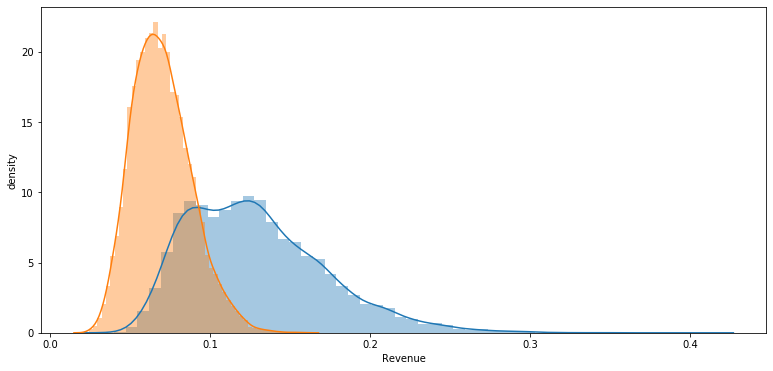

In [10]:
plt.figure(figsize=(13, 6))
nboot = 10000
#Перемешала выборки
random.shuffle(x1)
random.shuffle(x2)
#Разбила на бакеты
means_1, ci_1 = bootstrap(x1, nboot)
means_2, ci_2 = bootstrap(x2, nboot)
plt.ylabel('density')
sns.distplot(means_1, axlabel='Revenue')
sns.distplot(means_2)

In [11]:
print(sum(means_1) / len(means_1), sum(means_2) / len(means_2))

0.12879955357142767 0.06990934649122844


In [12]:
#проверяем выбросы
df['USER_ID']=df['USER_ID'].astype(str)
df.describe()

,REVENUE,orders
count,10000.000000,10000.000000
mean,0.099447,0.015200
std,2.318529,0.122354
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,196.010000,1.000000


In [13]:
df[df['REVENUE']>=100]

,USER_ID,VARIANT_NAME,REVENUE,orders
0,3342,control,196.01,1


In [14]:
#нашла один большой выброс заменяю его
df.loc[df['REVENUE']>=100, 'REVENUE'] = df['REVENUE'].median()

In [15]:
x1 = df[(df['VARIANT_NAME'] == 'control')]['REVENUE'].values
x2 = df[(df['VARIANT_NAME'] == 'variant')]['REVENUE'].values

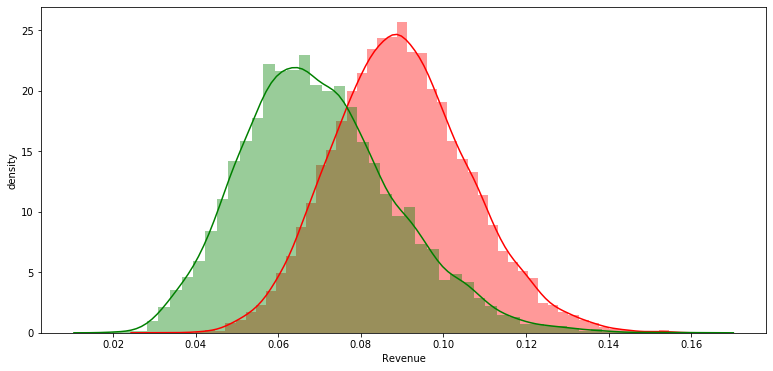

In [17]:
plt.figure(figsize=(13, 6))
nboot = 10000
#Перемешала выборки
random.shuffle(x1)
random.shuffle(x2)
#Разбила на бакеты
means_1, ci_1 = bootstrap(x1, nboot)
means_2, ci_2 = bootstrap(x2, nboot)
plt.ylabel('density')
sns.distplot(means_1, axlabel='Revenue', color='red')
sns.distplot(means_2, color='green')

In [15]:
sum(means_1) / len(means_1), sum(means_2) / len(means_2)

(0.0896536522873194, 0.0699391961722485)

### Метрика: Конверсия в покупку

In [19]:
y1 = df[(df['VARIANT_NAME'] == 'control')]['orders'].values
y2 = df[(df['VARIANT_NAME'] == 'variant')]['orders'].values

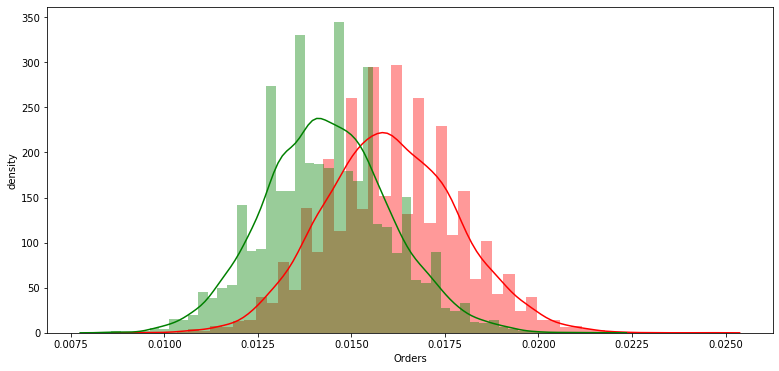

In [20]:
plt.figure(figsize=(13, 6))
nboot = 10000
#Перемешала выборки
random.shuffle(x1)
random.shuffle(x2)
#Разбила на бакеты
means_1, ci_1 = bootstrap(y1, nboot)
means_2, ci_2 = bootstrap(y2, nboot)
plt.ylabel('density')
sns.distplot(means_1, axlabel='Orders', color='red')
sns.distplot(means_2, color='green')

In [18]:
print(sum(means_1) / len(means_1), sum(means_2) / len(means_2))

0.016074378009630623 0.01434399920255086
